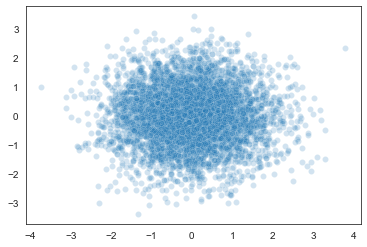

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed_n = 0
np.random.seed(seed_n)

# Generate Gaussian white noise data
mean, std, h_shape = 0, 1, (5000, 2)
hidden = np.random.normal(mean, std, h_shape)

# Plot the first 2 columns
sns.set_style('white')
sns.scatterplot(x=hidden.T[0], y=hidden.T[1], alpha=0.2)
plt.show()

In [2]:
import pandas as pd

# Create a dataframe to carry the data
column_names = [f'h_{i}' for i in range(h_shape[1])]
data = pd.DataFrame(hidden, columns=column_names)

data.head()

,h_0,h_1
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


In [3]:
# Apply a random non-linear transformation to the data
def random_transformation(x):
    functions = {0: np.sin, 1: np.exp, 2: np.tanh,
                 3: np.sign, 4: np.abs, 5: relu, 6: sigmoid}
    f_choice = np.random.randint(low=0, high=len(functions), size=1)[0]
    return functions[f_choice](x)

# Rectified linear unit
def relu(x):
    return np.sign(x) * x

# Logistic sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Shape of the observations space
x_shape = (h_shape[0], 4)

# Define X as a linear combination of random transformations on hidden variables
for i in range(x_shape[1]):
    data[f'x_{i}'] = 0
    for j in range(h_shape[1]):
        data[f'x_{i}'] += np.random.randn() * random_transformation(data[f'h_{j}'])

# Normalize X to have 0 mean and variance of 1
for i in range(x_shape[1]):
    data[f'x_{i}'] -= data[f'x_{i}'].mean()
    data[f'x_{i}'] /= data[f'x_{i}'].std()

data.head()

,h_0,h_1,x_0,x_1,x_2,x_3
0,1.764052,0.400157,-0.078636,-1.394295,0.342487,-1.670603
1,0.978738,2.240893,-4.204037,1.609099,2.371056,-0.555241
2,1.867558,-0.977278,0.503286,-0.573375,0.978499,-1.647191
3,0.950088,-0.151357,0.251263,-1.454170,0.068299,-0.243889
4,-0.103219,0.410599,0.166228,-0.501782,-1.143031,1.072514


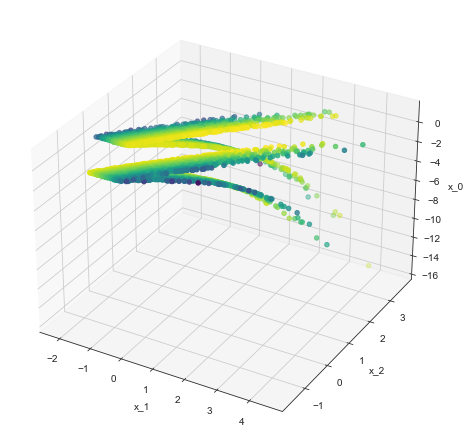

In [5]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figure setup and visual features
fig = plt.figure(figsize=(7,6))
ax = Axes3D(fig)
viridis_map = sns.color_palette('viridis', as_cmap=True)

# Plot the data in a 3D grid
ax.scatter(data['x_1'], data['x_2'], data['x_0'], c=data['x_3'],  marker='o', cmap=viridis_map)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_0')

plt.savefig('figures/observations.png', dpi=200)
plt.show()

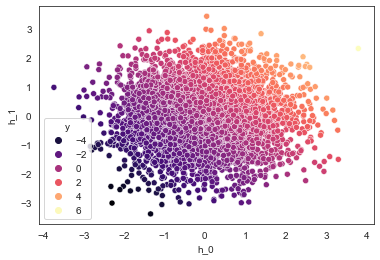

In [6]:
# Define a continuous label y
data['y'] = data['h_0'] + data['h_1']

# Colour h by the value of y
viridis_map = sns.color_palette('magma', as_cmap=True)
sns.scatterplot(data=data, x='h_0', y='h_1', hue='y', palette=viridis_map)
plt.savefig('figures/continuous_labels.png', dpi=250)
plt.show()

In [7]:
# Sava the dataset in a format that can be later used
data.to_csv(f'datasets/random_data_{seed_n}.csv', index=False)